In [1]:
import numpy as np
from scipy.sparse import diags
from scipy import signal
from scipy import stats
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import time
import matplotlib.animation
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
matplotlib.rcParams['animation.embed_limit'] = 2**128



from workhorse import *
from ploting import *

In [2]:
# To do:

# look at wave missing resonant frequency
# look at when wave hit exactly res freq
# look at when wave misses, but freq of potential takes it to res freq
# oscilate only one of the barriers at a time


In [31]:
e = 1.602176634e-19
hbar = 1.054571817e-34
m = 9.1093837015e-31
initialEnergy = 28.035e-3 * e
sigmaX = 200e-10
centerX = 40e-8
L = 3000e-9
vMax = 90e-3 * e
Nsteps = 10001
scaleTime = 0.05
bigT = 3/4
spatialScale = 11/11

initialValues = [e, hbar, m, initialEnergy, sigmaX, centerX, L, vMax, scaleTime, bigT, Nsteps, spatialScale]

cantorParameters = {
    "begining": 975e-9,
    "end": 1025e-9,
    "vMax": vMax,
    "iterations": 2,
    "partition": 5
}

dbTDParameters = {
    "center": 1500e-9,
    "vMax": vMax,
    "barrierWidth": 1.6e-9,
    "wellWidth": 6e-9,
    "potentialVar": 15e-3 * e,
    "phaseLeft": 0,
    "phaseRight": 0,
    "freqRight": 0,
    "freqLeft": 0
}

dbTIParameters = {
    "center": 1500e-9,
    "vMax": vMax,
    "barrierWidth": 1.6e-9,
    "wellWidth": 6e-9
}


dbTIParameters["begining"] = dbTIParameters["center"] - (0.5*dbTIParameters["wellWidth"] + dbTIParameters["barrierWidth"])
dbTIParameters["end"] = dbTIParameters["center"] + (0.5*dbTIParameters["wellWidth"] + dbTIParameters["barrierWidth"])

dbTDParameters["begining"] = dbTDParameters["center"] - (0.5*dbTDParameters["wellWidth"] + dbTDParameters["barrierWidth"])
dbTDParameters["end"] = dbTDParameters["center"] + (0.5*dbTDParameters["wellWidth"] + dbTDParameters["barrierWidth"])







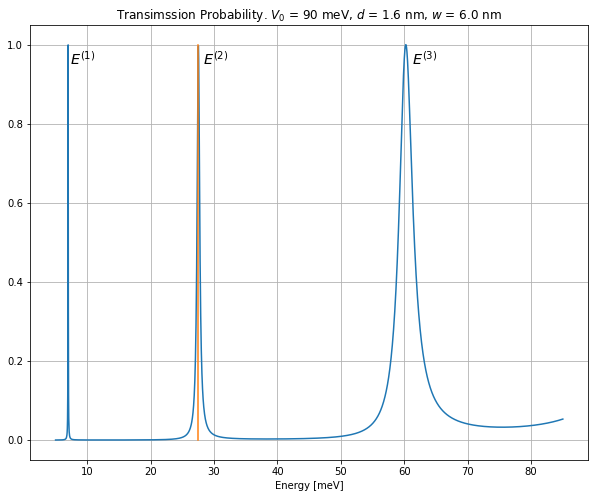

In [19]:
energyArrayProb = np.linspace(5e-3, 85e-3, 2500)
analTransProbability = analTransProb(energyArrayProb, 1.6e-9, 6e-9, vMaxx=90e-3)
plt.figure(figsize=(10, 8))
plt.plot(energyArrayProb*1e3, analTransProbability)
plt.grid()
plt.title(f"Transimssion Probability. $V_{0}$ = 90 meV, $d$ = 1.6 nm, $w$ = 6.0 nm")
plt.xlabel("Energy [meV]")
plt.text(7.2, 0.95, "$E^{(1)}$", fontsize = 'x-large')
plt.text(28.2, 0.95, "$E^{(2)}$", fontsize = 'x-large')
plt.text(61.2, 0.95, "$E^{(3)}$", fontsize = 'x-large')
plt.plot([27.5, 27.5], [0, 1.0])
plt.show()

In [14]:
staticWave = staticWavePropagation(initializePsi, dbTI, initialValues, dbTIParameters, 10000)
print(np.max(staticWave["step"]))

12.0


In [50]:
resonantEnergy = 29.537e-3*e
lift = 3.5e-3*e
initialEnergy = resonantEnergy - lift
dbTDParameters["freqRight"] = (resonantEnergy-initialEnergy)/hbar
dbTDParameters["freqLeft"] = (resonantEnergy-initialEnergy)/hbar
initialValues = [e, hbar, m, initialEnergy, sigmaX, centerX, L, vMax, scaleTime, bigT, Nsteps, kramps]

In [51]:
staticWave = tdWavePropagation(initializePsi, dbTD, initialValues, dbTDParameters, 5000)
print(np.max(staticWave["step"]))

22.0


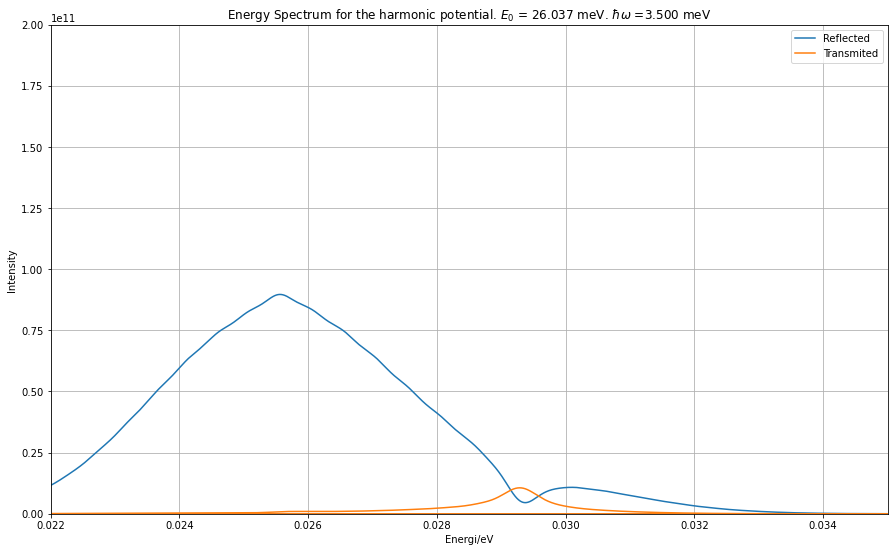

In [52]:
freq, refAmp, transAmp = fourierTransform(staticWave, initialValues, -1, dbTDParameters)
energySpectrum(freq, refAmp, transAmp, title=f"Energy Spectrum for the harmonic potential. $E_{0}$ = {initialEnergy*(1e3/e):.3f} meV. $\hbar\omega$ ={(resonantEnergy-initialEnergy)*(1e3/e):.3f} meV", limits = [22e-3, 35e-3, 0, 2e11], figsizeInput=[15, 9])

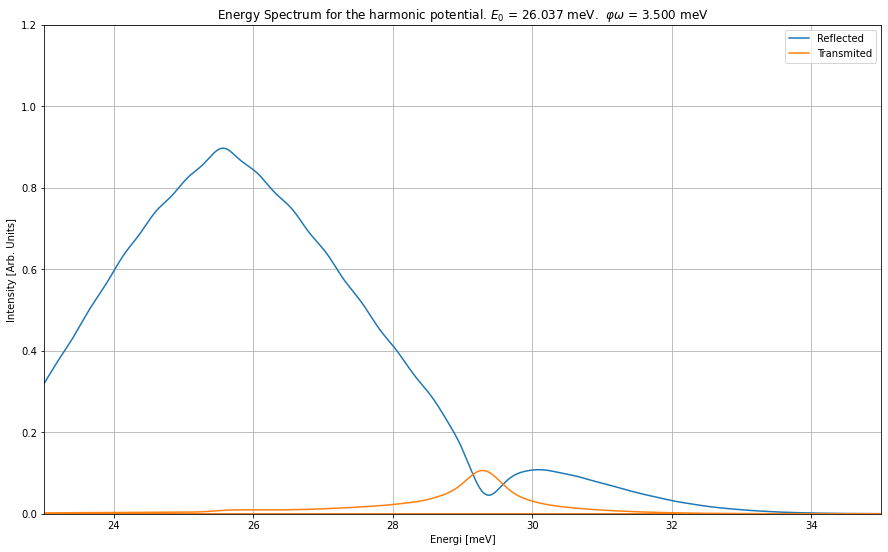

In [63]:

limits = [23, 35, 0, 1.2]
figsizeInput=[15, 9]

energySpec = ((freq*hbar)**2)/(2*m)*1e3



plt.figure(figsize = (figsizeInput[0], figsizeInput[1]))

plt.plot(energySpec/e, refAmp*1e-11, label = 'Reflected') 
plt.plot(energySpec/e, transAmp*1e-11, label = 'Transmited')



plt.xlim(limits[0], limits[1])
plt.ylim(limits[2], limits[3])
plt.xlabel('Energi [meV]')
plt.ylabel('Intensity [Arb. Units]')
plt.title(f"Energy Spectrum for the harmonic potential. $E_{0}$ = {initialEnergy*(1e3/e):.3f} meV. " + r" $\varphi\omega$" +f" = {(resonantEnergy-initialEnergy)*(1e3/e):.3f} meV")
plt.grid()
plt.legend()
plt.show()

In [53]:
print(f"$\hbar$")

$\hbar$
